## Importing libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

## Load and inspect the data

In [16]:
df = pd.read_csv("../data/processed/merged_data.csv")
df.shape, df.columns


((53759, 18),
 Index(['vaga_id', 'candidato_id', 'situacao', 'comentario', 'nome',
        'titulo_vaga', 'modalidade_vaga', 'cliente', 'sap',
        'nivel_profissional', 'idioma', 'competencias_tecnicas',
        'nivel_academico', 'ingles', 'espanhol', 'area_atuacao',
        'conhecimentos', 'cv'],
       dtype='object'))

In [17]:
df.head()

,vaga_id,candidato_id,situacao,comentario,nome,titulo_vaga,modalidade_vaga,cliente,sap,nivel_profissional,idioma,competencias_tecnicas,nivel_academico,ingles,espanhol,area_atuacao,conhecimentos,cv
0,4530,25632,Encaminhado ao Requisitante,"Encaminhado para - PJ R$ 72,00/hora",José Vieira,CONSULTOR CONTROL M,NaN,"Morris, Moran and Dodson",Não,Pleno,Nenhum,- Experiência comprovada em projetos de control-M,NaN,NaN,NaN,NaN,NaN,\ndados pessoais\nestado civil: casado\nidade:...
1,4530,25529,Encaminhado ao Requisitante,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Srta. Isabela Cavalcante,CONSULTOR CONTROL M,NaN,"Morris, Moran and Dodson",Não,Pleno,Nenhum,- Experiência comprovada em projetos de control-M,Ensino Superior Completo,Intermediário,Básico,"TI - Governança, TI - Infraestrutura, TI - Pro...",NaN,"solteiro, 47 anos\n\nestrada meringuava, nº 17..."
2,4531,25364,Contratado pela Decision,Data de Inicio: 12/04/2021,Sra. Yasmin Fernandes,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Gonzalez and Sons,Não,Sênior,Nenhum,O recurso Peoplesoft tem como responsabilidade...,Ensino Superior Completo,Avançado,Intermediário,TI - Projetos,"- PeopleSoft (PeopleTools 8.49, 8.53, 8.55, 8....",\n\nárea de atuação: lider de consultoria / ge...
3,4531,25360,Encaminhado ao Requisitante,NaN,Alexia Barbosa,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Gonzalez and Sons,Não,Sênior,Nenhum,O recurso Peoplesoft tem como responsabilidade...,NaN,NaN,NaN,NaN,NaN,informações pessoais\n estado civil: casado\n...
4,4533,26338,Contratado pela Decision,NaN,Arthur Almeida,2021-2605708-Microfocus Application Life Cycle...,NaN,Barnes-Woods,Não,Sênior,Técnico,Arquiteto\n\nFoco na área e automação.\n\nRequ...,NaN,NaN,NaN,NaN,NaN,"solteiro, brasileiro, 21/06/1987\nhabilitação ..."


## Exploratory Data Analysis (EDA)

In [18]:
# Verificar os valores únicos e frequências da coluna "situacao"
df['situacao'].value_counts()


situacao
Prospect                          20021
Encaminhado ao Requisitante       16122
Inscrito                           3980
Não Aprovado pelo Cliente          3492
Contratado pela Decision           2758
Desistiu                           2349
Não Aprovado pelo RH               1765
Não Aprovado pelo Requisitante      765
Entrevista Técnica                  579
Sem interesse nesta vaga            576
Entrevista com Cliente              469
Em avaliação pelo RH                375
Contratado como Hunting             226
Aprovado                            209
Desistiu da Contratação              59
Documentação PJ                       4
Documentação CLT                      3
Recusado                              2
Documentação Cooperado                2
Encaminhar Proposta                   2
Proposta Aceita                       1
Name: count, dtype: int64

In [ ]:
# Definindo os valores
valores_sucesso = [
    "Contratado pela Decision",
    "Contratado como Hunting",
    "Proposta Aceita"
]

valores_excluir = [
    "Prospect", "Inscrito", "Encaminhado ao Requisitante",
    "Entrevista Técnica", "Entrevista com Cliente",
    "Em avaliação pelo RH", "Encaminhar Proposta",
    "Documentação PJ", "Documentação CLT", "Documentação Cooperado"
]

# Filtrar o dataset
df = df[~df["situacao"].isin(valores_excluir)]

# Criar a variável target
df["target"] = df["situacao"].apply(lambda x: 1 if x in valores_sucesso else 0)

# Verificar a distribuição final
df["target"].value_counts(normalize=True)


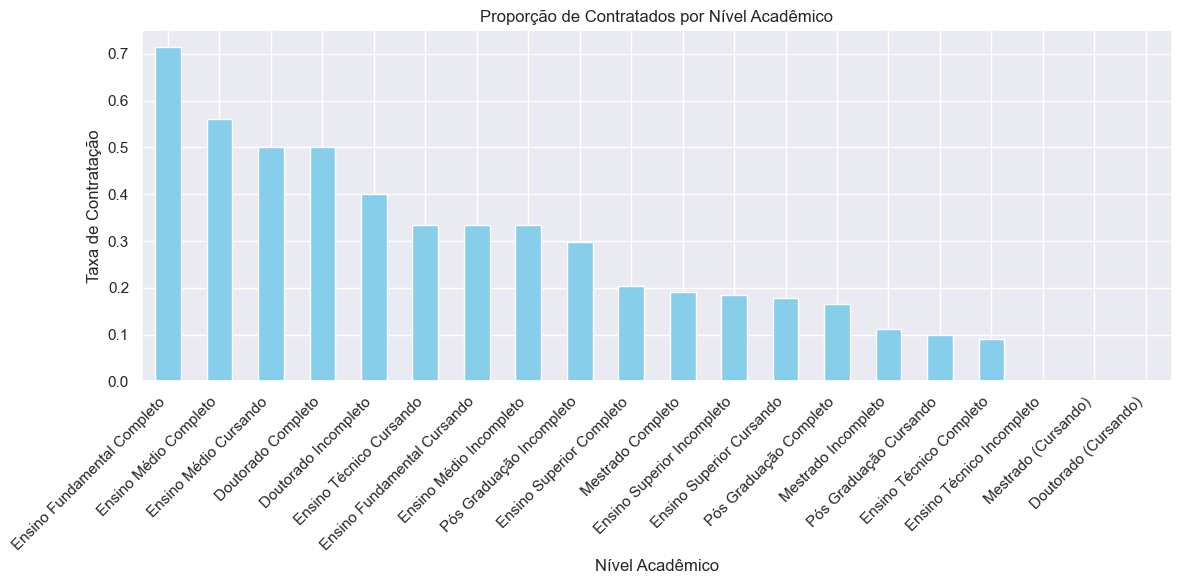

In [23]:
# Corrigir e padronizar os nomes dos níveis acadêmicos
df['nivel_academico'] = df['nivel_academico'].str.strip().str.title()

# Substituições manuais para uniformizar
df['nivel_academico'] = df['nivel_academico'].replace({
    'Ensino Medio Completo': 'Ensino Médio Completo',
    'Ensino Medio Incompleto': 'Ensino Médio Incompleto',
    'Ensino Tecnico Completo': 'Ensino Técnico Completo',
    'Ensino Tecnico Cursando': 'Ensino Técnico Cursando',
    'Ensino Superior Cursando ': 'Ensino Superior Cursando',
    'Pos Graduacao': 'Pós-Graduação',
    'Pos Graduacao Cursando': 'Pós-Graduação Cursando',
    'Doutorado Cursando': 'Doutorado (Cursando)',
    'Mestrado Cursando': 'Mestrado (Cursando)',
})

# Gerar gráfico atualizado
nivel_acad_target = df.groupby('nivel_academico')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
nivel_acad_target.plot(kind='bar', title='Proporção de Contratados por Nível Acadêmico', color='skyblue')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Nível Acadêmico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


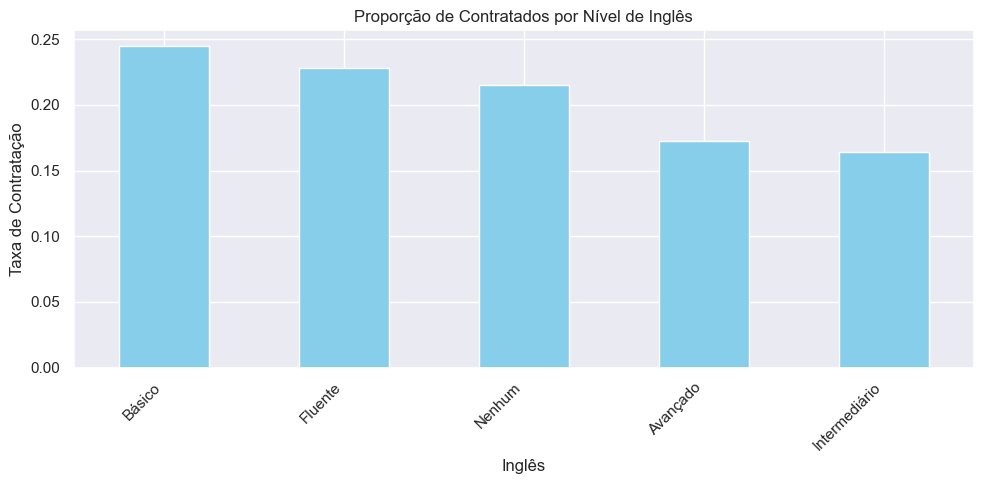

In [24]:
# Padronizar valores de idioma
df['ingles'] = df['ingles'].str.strip().str.title()
df['espanhol'] = df['espanhol'].str.strip().str.title()

# Proporção de contratação por nível de inglês
ingles_target = df.groupby('ingles')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ingles_target.plot(kind='bar', title='Proporção de Contratados por Nível de Inglês', color='skyblue')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Inglês')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


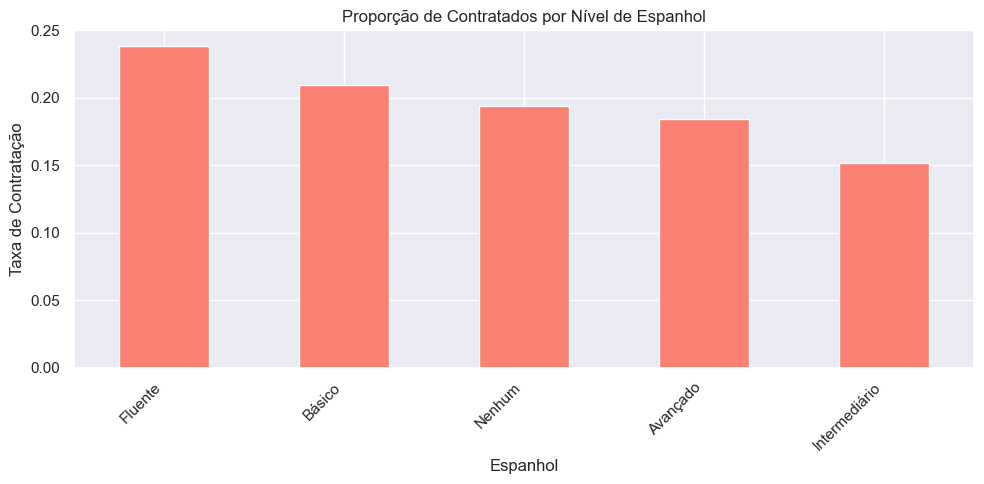

In [25]:
# Proporção de contratação por nível de espanhol
espanhol_target = df.groupby('espanhol')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
espanhol_target.plot(kind='bar', title='Proporção de Contratados por Nível de Espanhol', color='salmon')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Espanhol')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


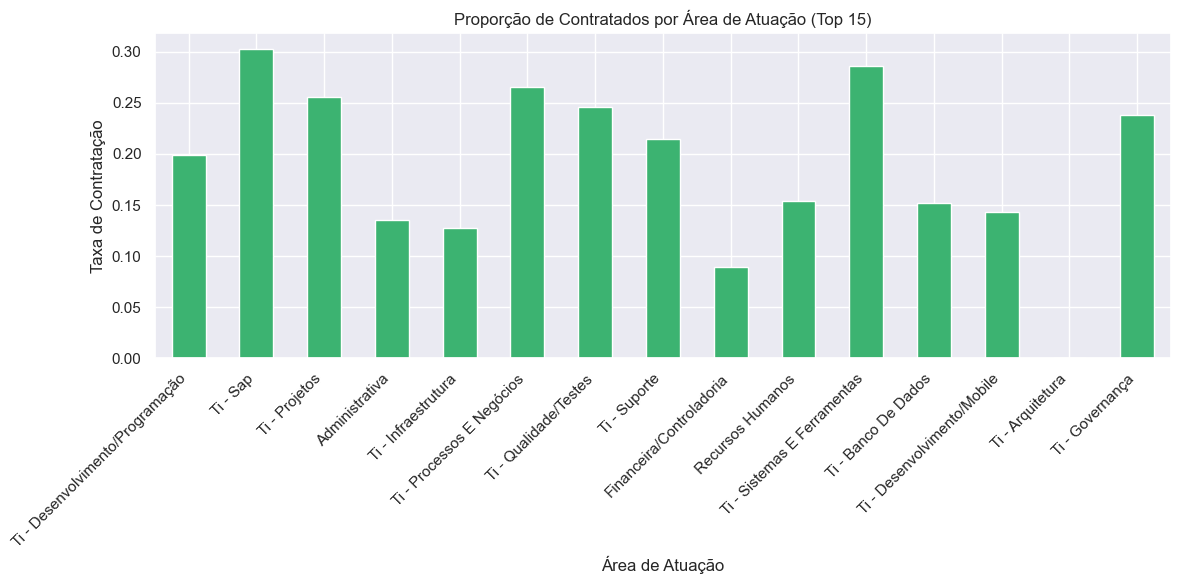

In [29]:
top_areas = (
    df.groupby('area_atuacao')['target']
    .agg(['count', 'mean'])
    .sort_values('count', ascending=False)
    .head(15)
)

plt.figure(figsize=(12, 6))
top_areas['mean'].plot(kind='bar', color='mediumseagreen', title='Proporção de Contratados por Área de Atuação (Top 15)')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Área de Atuação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


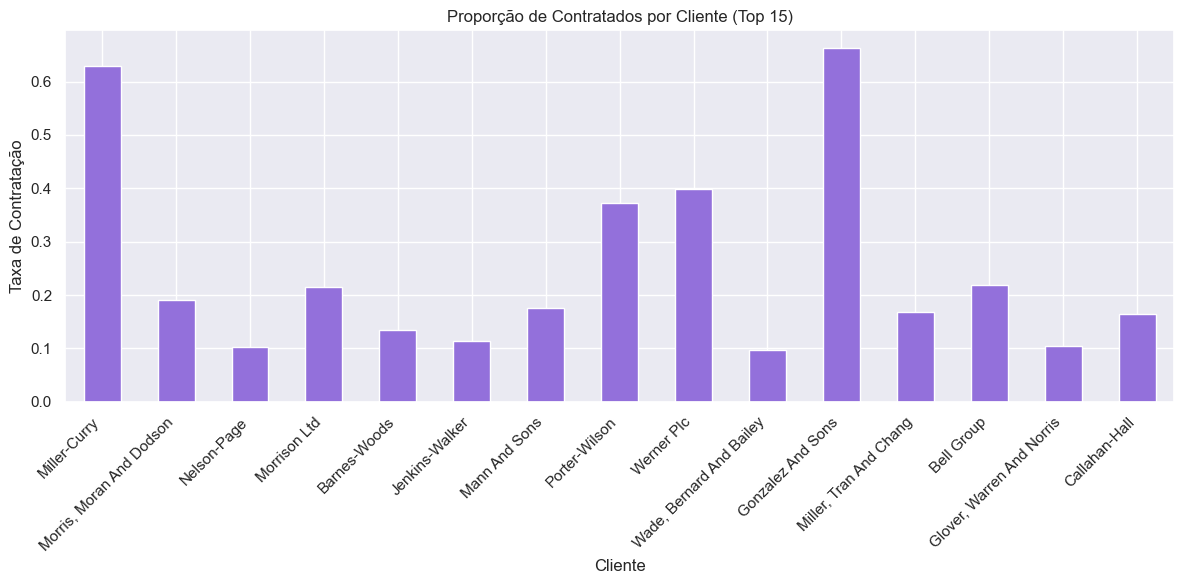

In [30]:
# Padronizar
df['cliente'] = df['cliente'].str.strip().str.title()

# Agrupar e ordenar por frequência
cliente_target = (
    df.groupby('cliente')['target']
    .agg(['count', 'mean'])
    .sort_values('count', ascending=False)
    .head(15)
)

# Plotar
plt.figure(figsize=(12, 6))
cliente_target['mean'].plot(kind='bar', title='Proporção de Contratados por Cliente (Top 15)', color='mediumpurple')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Cliente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


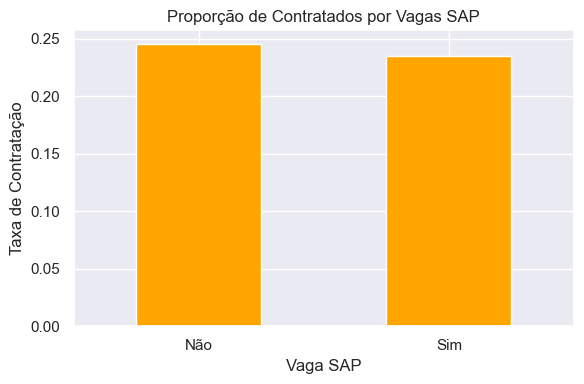

In [31]:
df['sap'] = df['sap'].str.strip().str.title()  # valores como 'Sim', 'Não', etc.

sap_target = df.groupby('sap')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sap_target.plot(kind='bar', color='orange', title='Proporção de Contratados por Vagas SAP')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Vaga SAP')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


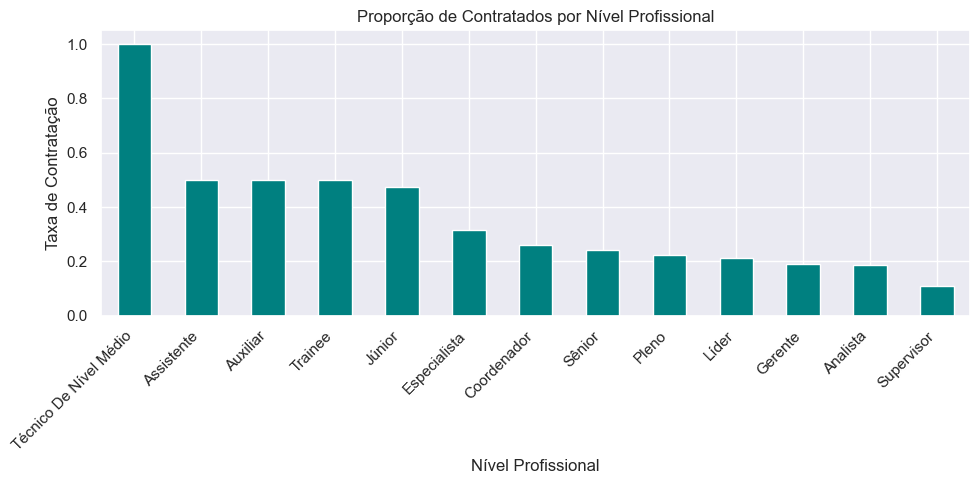

In [32]:
df['nivel_profissional'] = df['nivel_profissional'].str.strip().str.title()

nivel_prof_target = df.groupby('nivel_profissional')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
nivel_prof_target.plot(kind='bar', title='Proporção de Contratados por Nível Profissional', color='teal')
plt.ylabel('Taxa de Contratação')
plt.xlabel('Nível Profissional')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
